In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-05", tz="America/New_York").isoformat()

In [5]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [6]:
# Set timeframe to one day ('1Day') for the Alpaca API
timeframe = "1Day"

In [7]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-06-01 04:00:00+00:00,224.39,232.440,223.5000,231.91,18223882,174872,229.264613,FB
2020-06-02 04:00:00+00:00,230.94,233.000,226.5600,232.72,20919029,191654,229.851235,FB
2020-06-03 04:00:00+00:00,232.39,232.650,228.5300,230.16,15380413,166041,230.239999,FB
2020-06-04 04:00:00+00:00,229.56,231.630,224.6100,226.29,17041531,180306,227.779705,FB
2020-06-05 04:00:00+00:00,226.57,231.350,225.3105,230.77,16750586,166521,229.928852,FB
2020-06-01 04:00:00+00:00,31.06,32.100,30.8400,31.89,14583619,91305,31.700367,TWTR
2020-06-02 04:00:00+00:00,32.19,32.425,31.6100,32.26,15318429,80500,32.076930,TWTR
2020-06-03 04:00:00+00:00,32.68,35.040,32.4400,34.88,28414273,153153,34.010520,TWTR
2020-06-04 04:00:00+00:00,34.49,34.940,33.3400,33.72,20106238,107081,33.960112,TWTR


In [8]:
# Separate Ticker Data
FB = df_portfolio[df_portfolio['symbol']=='FB'].drop('symbol', axis=1)
TWTR = df_portfolio[df_portfolio['symbol']=='TWTR'].drop('symbol', axis=1)

# Concatenate the Ticker DataFrames
df_portfolio = pd.concat([FB,TWTR],axis=1, keys=['FB','TWTR'])

# Display sample data
df_portfolio

FB                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-06-01 04:00:00+00:00  224.39  232.44  223.5000  231.91  18223882   
2020-06-02 04:00:00+00:00  230.94  233.00  226.5600  232.72  20919029   
2020-06-03 04:00:00+00:00  232.39  232.65  228.5300  230.16  15380413   
2020-06-04 04:00:00+00:00  229.56  231.63  224.6100  226.29  17041531   
2020-06-05 04:00:00+00:00  226.57  231.35  225.3105  230.77  16750586   

                                                    TWTR                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-06-01 04:00:00+00:00      174872  229.264613  31.06  32.100  30.84   
2020-06-02 04:00:00+00:00      191654  229.851235  32.19  32.425  31.61   
2020-06-03 04:00:00+00:00      166041  230.239999  32.68  35.040  32.44   
2020-06-04 04:00:00+00:00      180306  227.779705  34.49  34.940  33.34   
2020-06-05 04:00:00+00:00      166521  229.928852  34.52  35.970  34.47   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2020-06-01 04:00:00+00:00  31.89  14583619       91305  31.700367  
2020-06-02 04:00:00+00:00  32.26  15318429       80500  32.076930  
2020-06-03 04:00:00+00:00  34.88  28414273      153153  34.010520  
2020-06-04 04:00:00+00:00  33.72  20106238      107081  33.960112  
2020-06-05 04:00:00+00:00  34.87  23215030      133451  35.232504

In [10]:
fb_close = df_portfolio["FB"]["close"]

In [11]:
# Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of FB and TWTR
closing_prices_df["FB"] = df_portfolio["FB"]["close"]
closing_prices_df["TWTR"] = df_portfolio["TWTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df.head(10)

,FB,TWTR
2020-06-01,231.91,31.89
2020-06-02,232.72,32.26
2020-06-03,230.16,34.88
2020-06-04,226.29,33.72
2020-06-05,230.77,34.87


In [12]:
# Compute daily returns
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display sample data
daily_returns_df.head()

,FB,TWTR
2020-06-02,0.003493,0.011602
2020-06-03,-0.011000,0.081215
2020-06-04,-0.016814,-0.033257
2020-06-05,0.019798,0.034104


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR - June 2020'}>

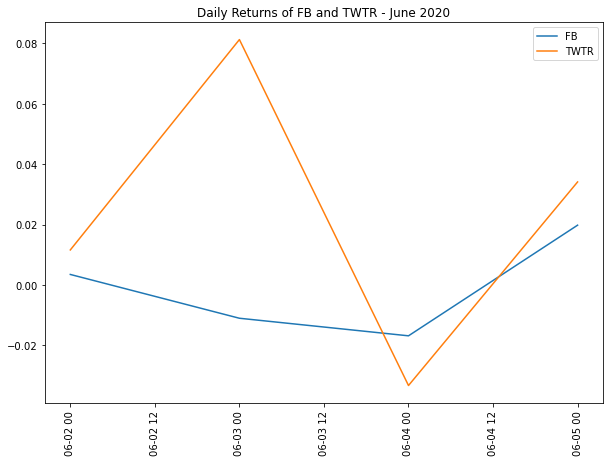

In [13]:
# Plot daily returns
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)